<h1 style="font-size: 25px; color:brown;text-align: center;
           "> BIRD CLASSIFICATION USING MACHINE LEARNING

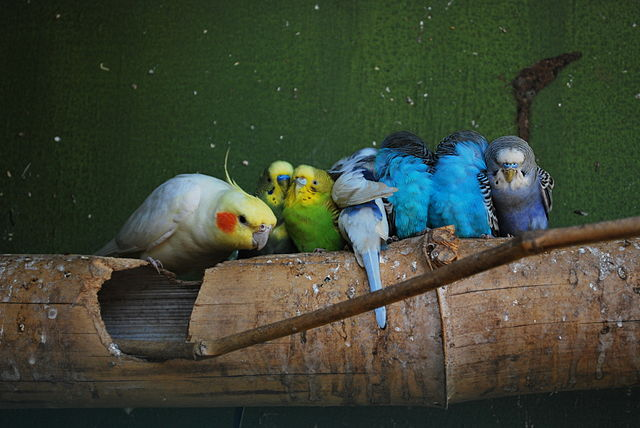

##### Dataset Link
https://www.kaggle.com/datasets/zhangjuefei/birds-bones-and-living-habits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from itertools import cycle
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv('bird.csv')
data.sample(10)

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
223,223,107.06,8.62,129.08,6.48,71.03,6.87,100.06,6.10,68.64,5.87,R
166,166,63.48,4.03,77.33,3.65,26.84,2.31,48.82,2.51,22.91,1.70,W
371,371,13.67,1.27,17.52,1.08,12.77,1.16,25.47,0.98,18.15,1.28,SO
385,385,24.28,2.16,30.29,1.91,20.32,1.62,29.29,1.47,24.48,1.39,SO
196,196,32.28,3.34,28.79,2.45,38.46,2.82,52.93,2.50,30.97,2.48,T
41,41,100.05,6.36,107.80,5.83,36.79,3.19,54.97,3.38,27.78,5.07,SW
332,332,21.85,2.06,25.90,1.75,20.86,1.72,34.26,1.43,23.25,1.18,SO
358,358,19.40,1.88,25.08,1.57,18.89,1.52,36.89,1.31,29.86,1.04,SO
373,373,14.62,1.39,19.23,1.12,14.13,0.97,26.11,1.03,18.23,0.73,SO
182,182,44.58,5.76,52.76,4.84,40.47,3.76,56.42,3.31,31.32,3.34,T


In [3]:
data.shape

(420, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,420.0,209.500000,121.387808,0.00,104.7500,209.500,314.250,419.00
huml,419.0,64.650501,53.834549,9.85,25.1700,44.180,90.310,420.00
humw,419.0,4.370573,2.854617,1.14,2.1900,3.500,5.810,17.84
ulnal,417.0,69.115372,58.784775,14.09,28.0500,43.710,97.520,422.00
ulnaw,418.0,3.597249,2.186747,1.00,1.8700,2.945,4.770,12.00
feml,418.0,36.872416,19.979082,11.83,21.2975,31.130,47.120,117.07
femw,419.0,3.220883,2.023581,0.93,1.7150,2.520,4.135,11.64
tibl,418.0,64.662823,37.838145,5.50,36.4175,52.120,82.870,240.00
tibw,419.0,3.182339,2.080827,0.87,1.5650,2.490,4.255,11.03
tarl,419.0,39.229976,23.184313,7.77,23.0350,31.740,50.250,175.00


In [6]:
data.isnull().mean()*100

id       0.000000
huml     0.238095
humw     0.238095
ulnal    0.714286
ulnaw    0.476190
feml     0.476190
femw     0.238095
tibl     0.476190
tibw     0.238095
tarl     0.238095
tarw     0.238095
type     0.000000
dtype: float64

In [7]:
data.dropna(inplace=True)

In [8]:
data.duplicated().mean()*100

0.0

### EDA (Exploratory Data Analysis)

#####  Univariate Analysis

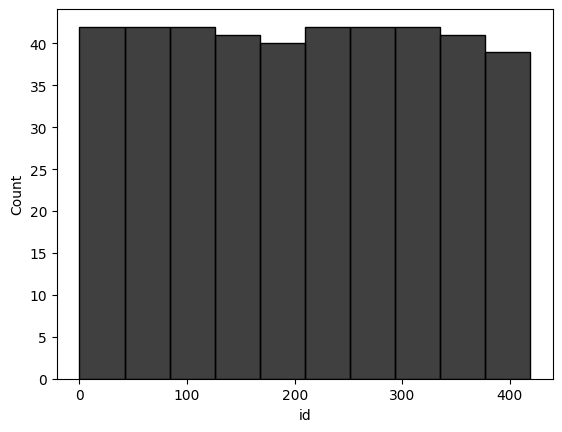

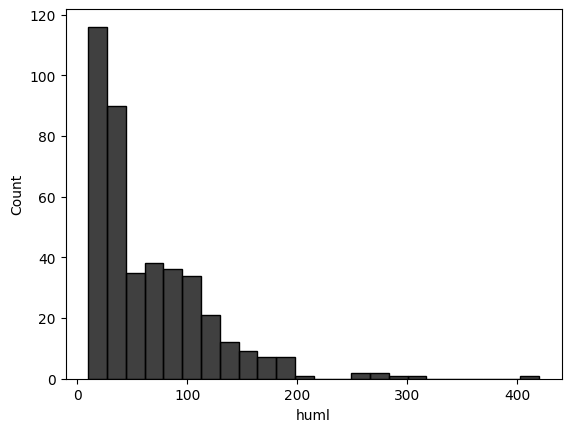

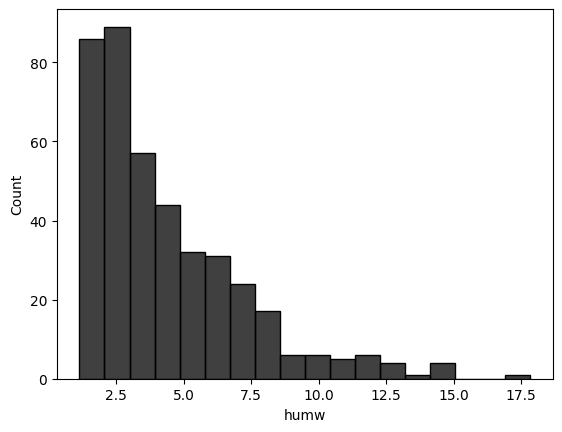

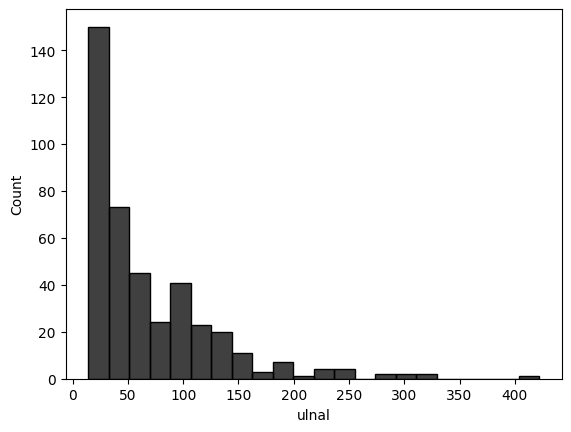

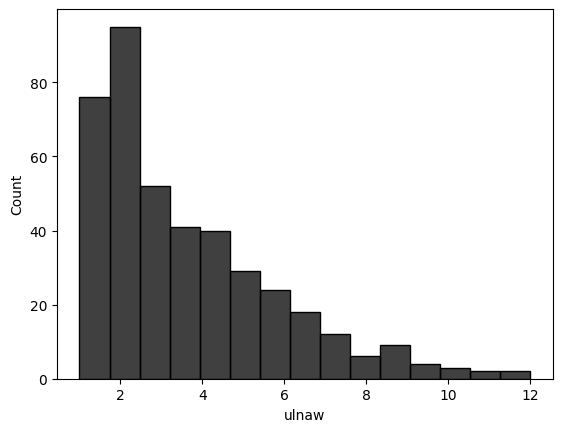

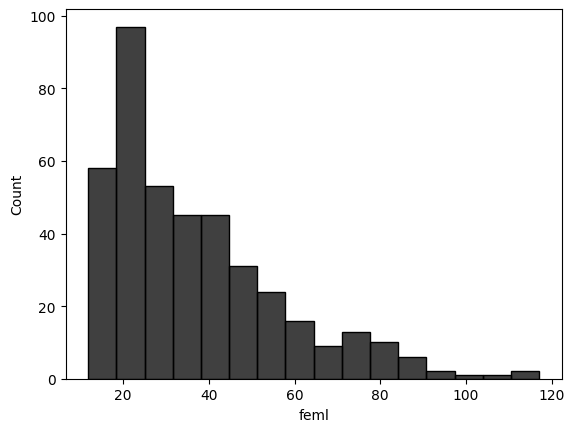

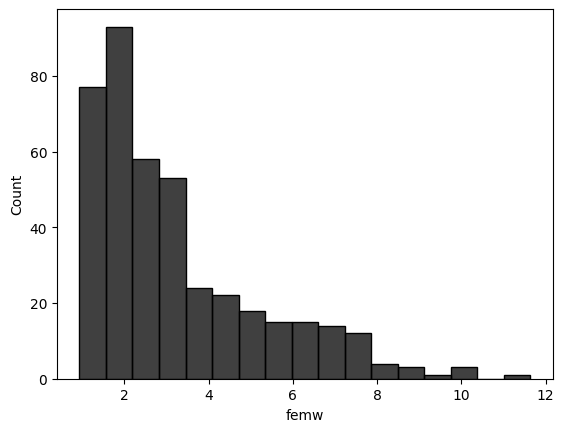

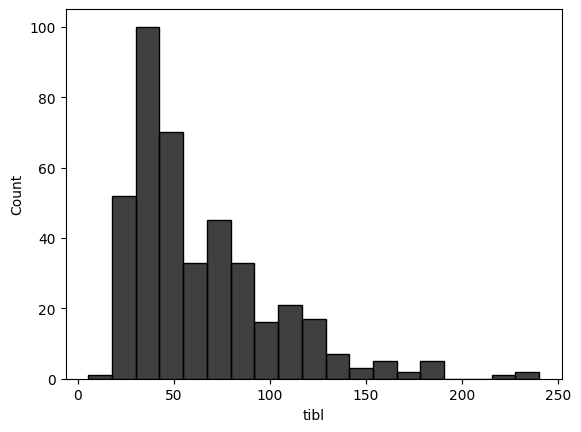

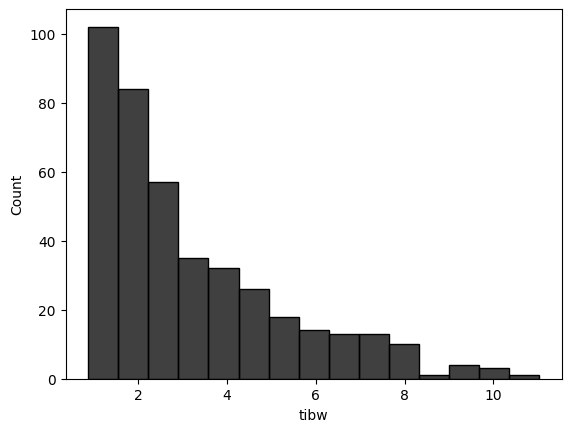

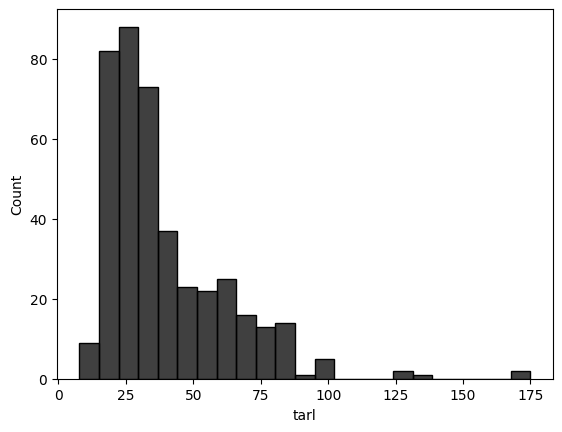

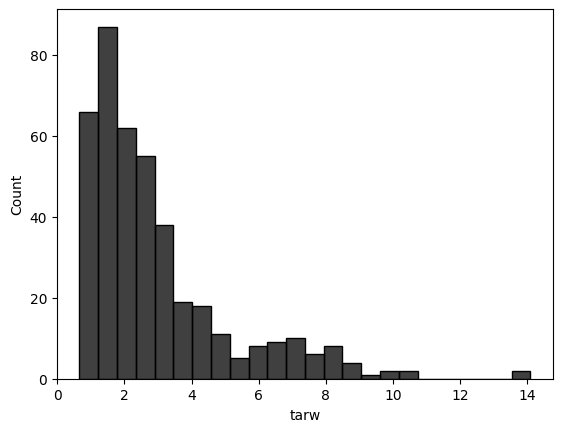

In [9]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.histplot(x=data[i],color="black")
        plt.show()

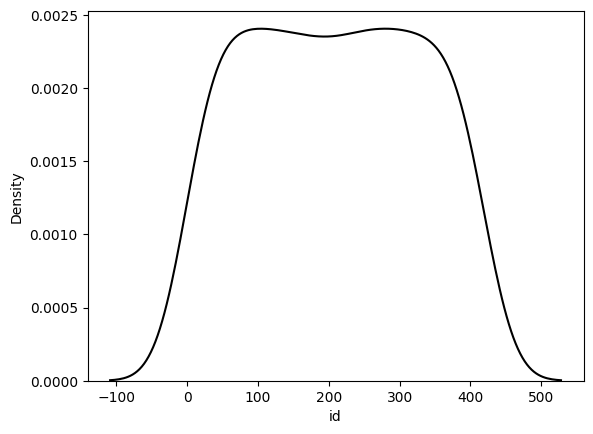

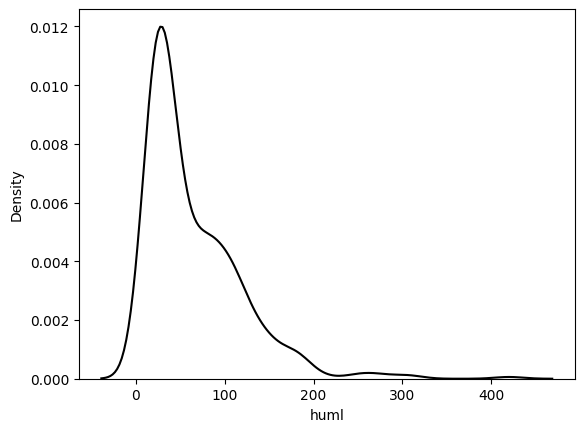

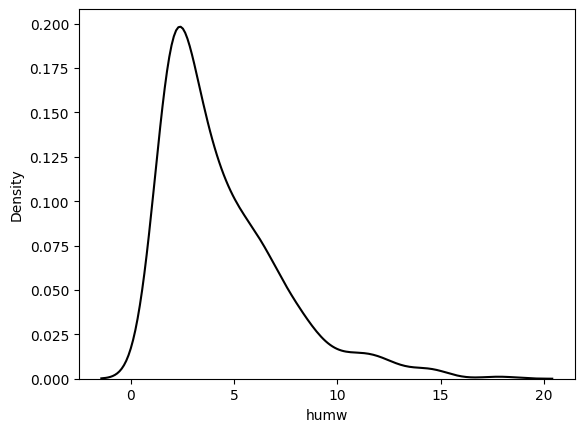

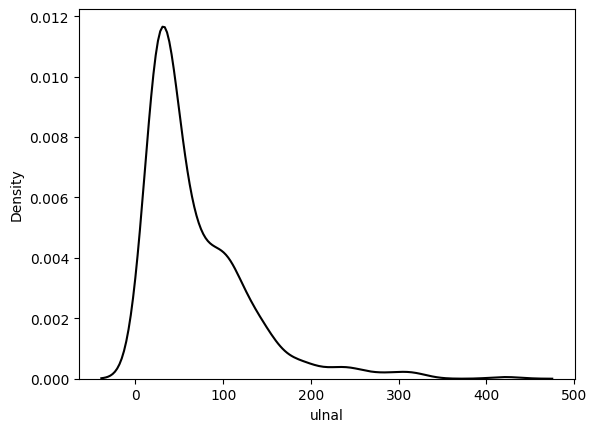

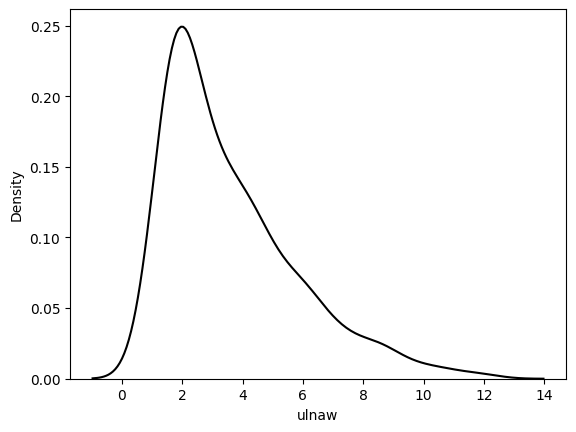

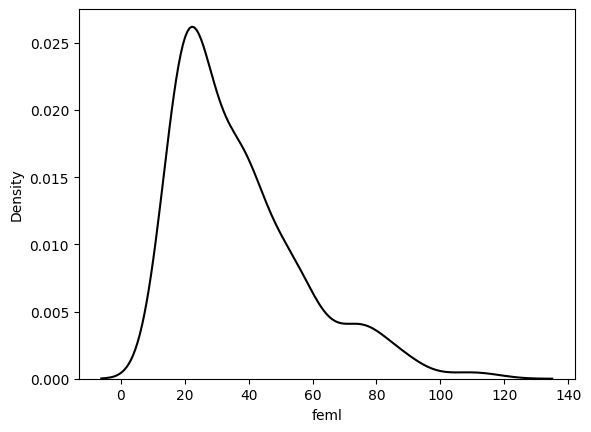

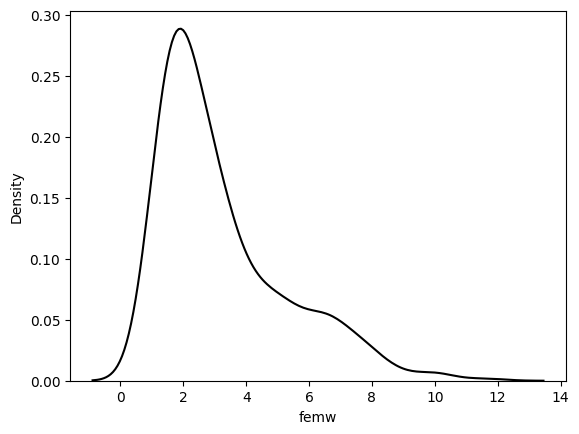

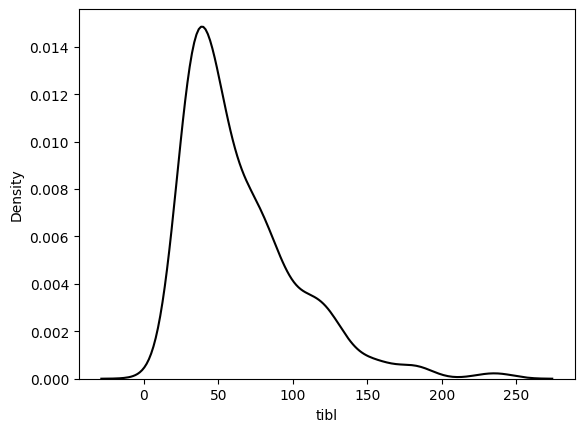

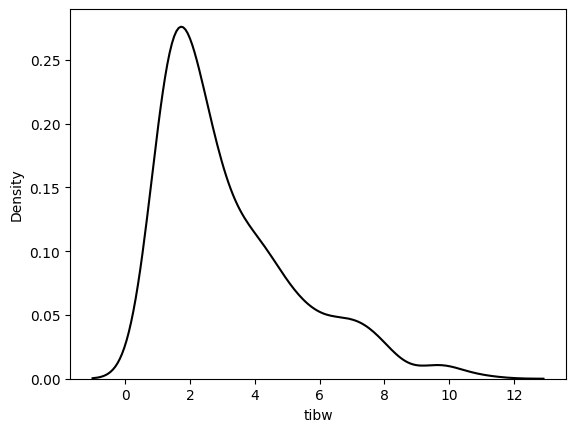

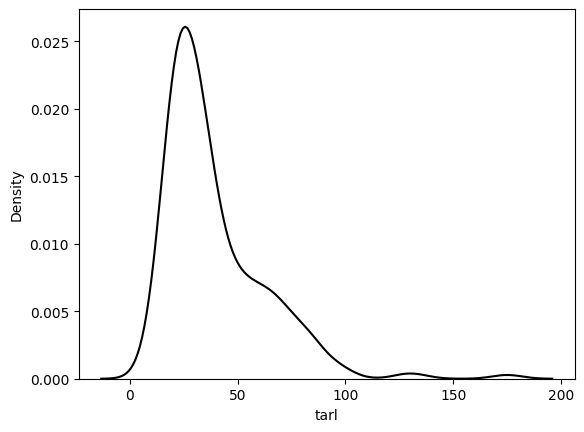

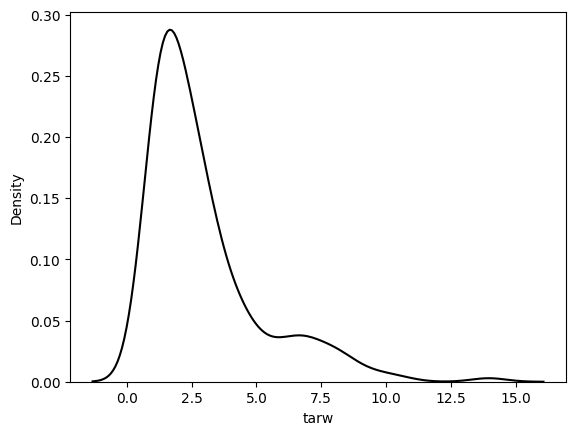

In [10]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i],color="black")
        plt.show()

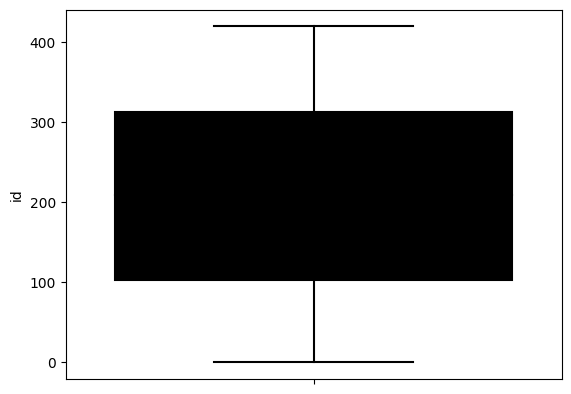

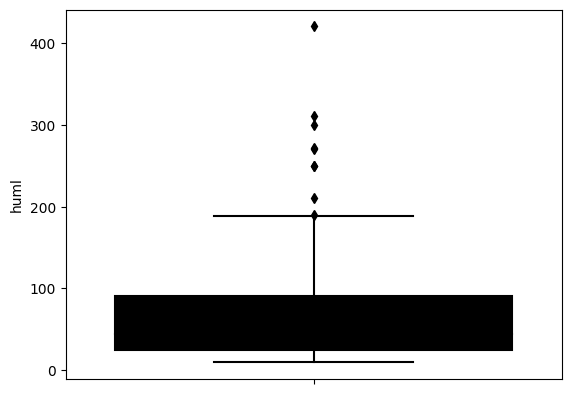

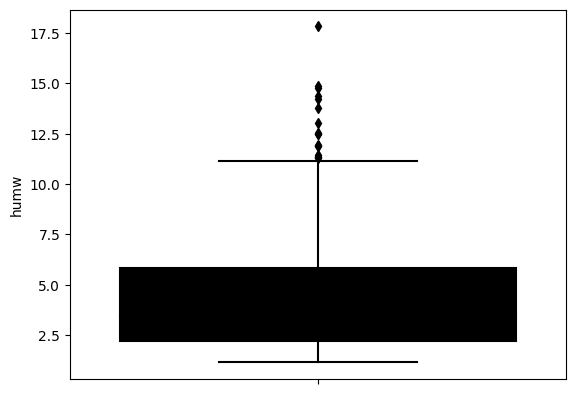

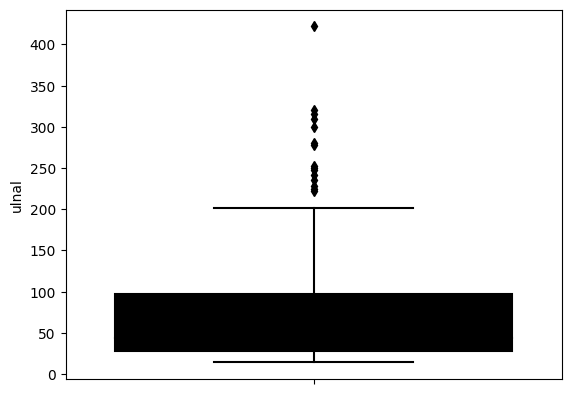

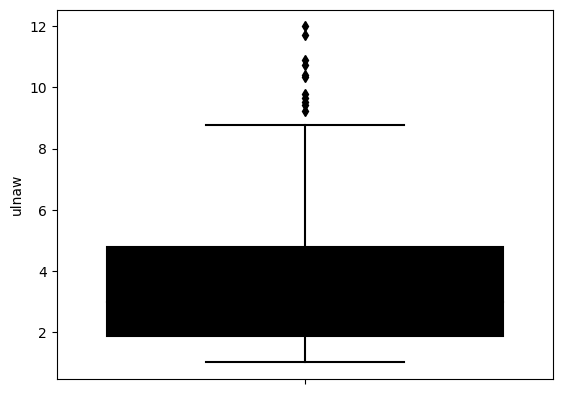

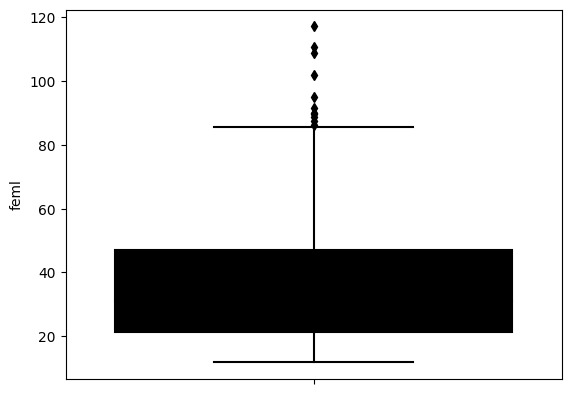

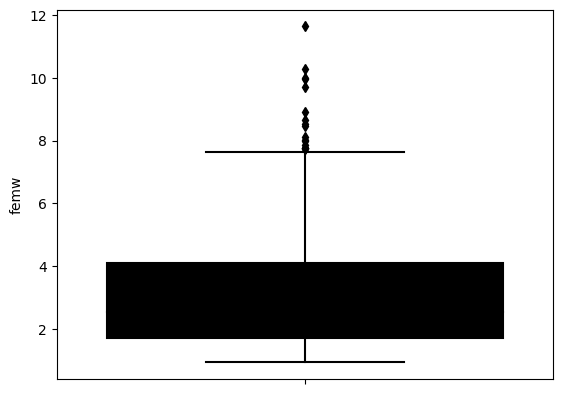

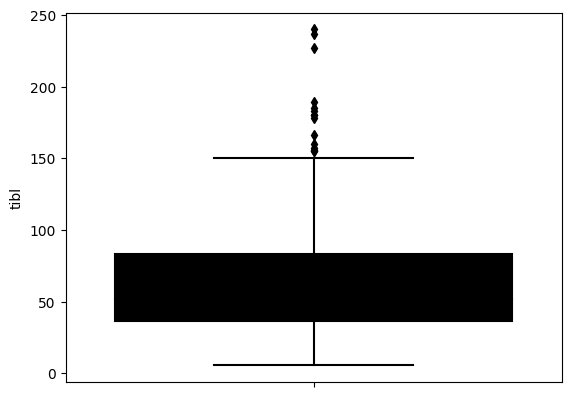

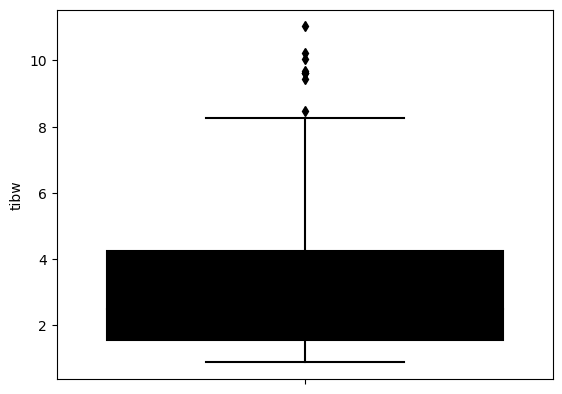

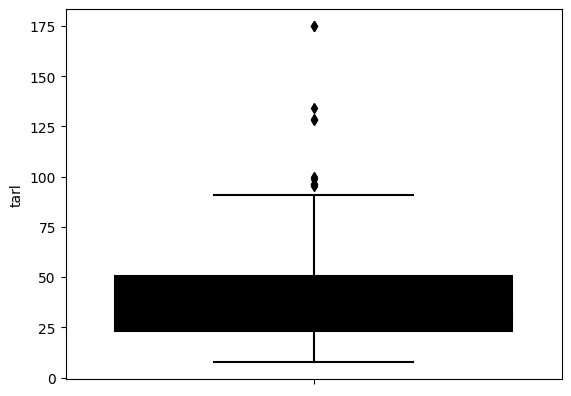

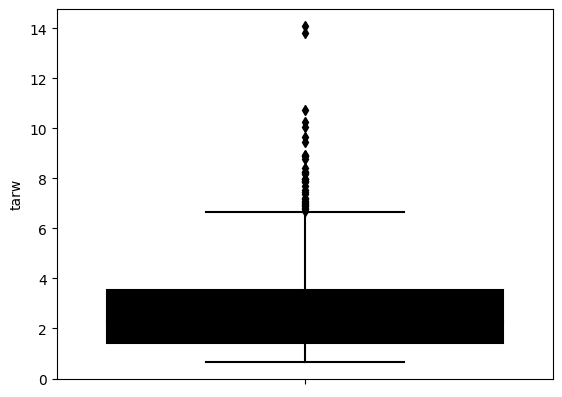

In [11]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i],color='black')
        plt.show()

##### Multivariate Analysis

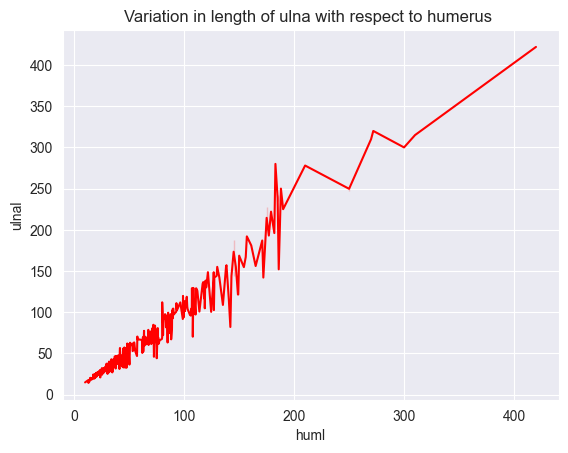

In [12]:
sns.set_style('darkgrid')
sns.lineplot(x='huml',y='ulnal',data=data,color='red')
plt.title('Variation in length of ulna with respect to humerus ')
plt.show()

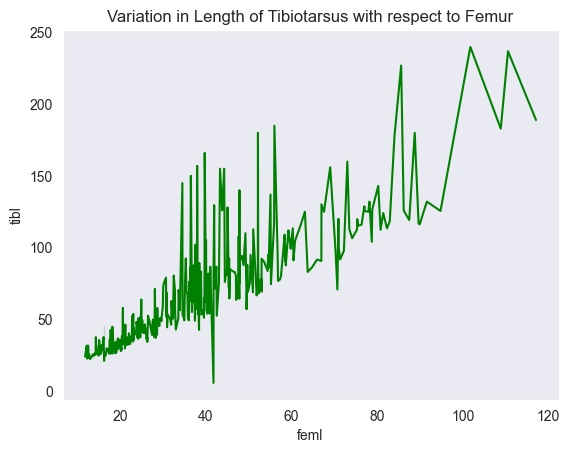

In [13]:
sns.set_style('dark')
sns.lineplot(x='feml',y='tibl',data=data,color='green')
plt.title('Variation in Length of Tibiotarsus with respect to Femur')
plt.show()

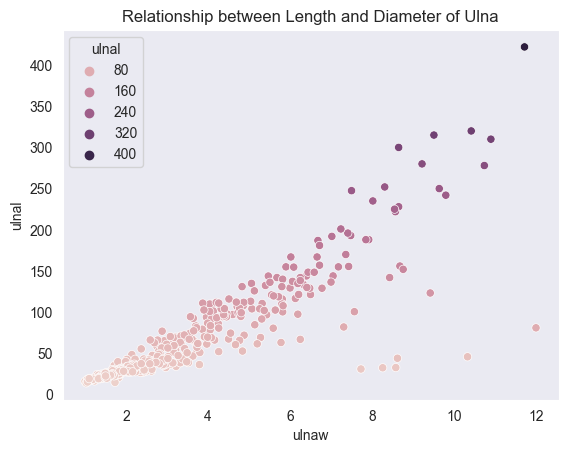

In [14]:
sns.scatterplot(x='ulnaw',y='ulnal',data=data,hue='ulnal');
plt.title('Relationship between Length and Diameter of Ulna')
plt.show()

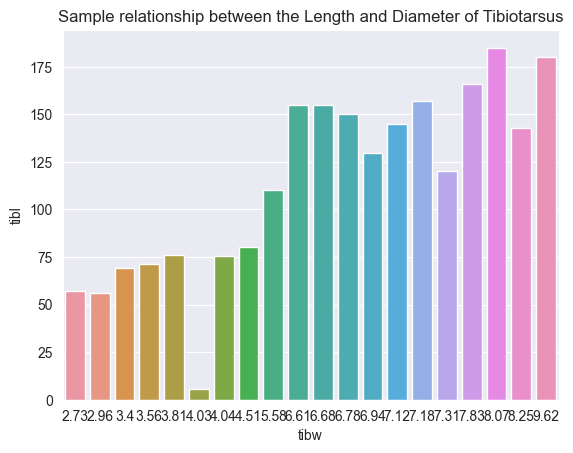

In [15]:
sns.set_style('darkgrid')
sns.barplot(x='tibw',y='tibl', data=data[:20]);
plt.title('Sample relationship between the Length and Diameter of Tibiotarsus')
plt.show()

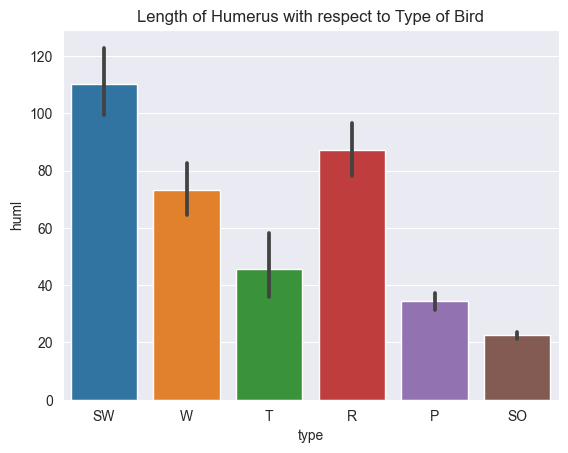

In [16]:
sns.barplot(x='type',y='huml', data=data);
plt.title('Length of Humerus with respect to Type of Bird')
plt.show()

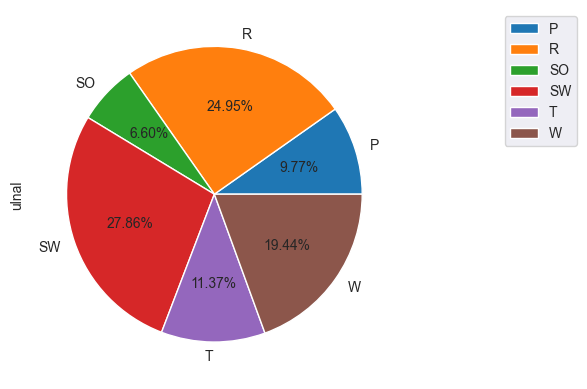

In [17]:
quality_alcohol=data.groupby(['type'])['ulnal'].mean()
quality_alcohol.plot.pie(autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

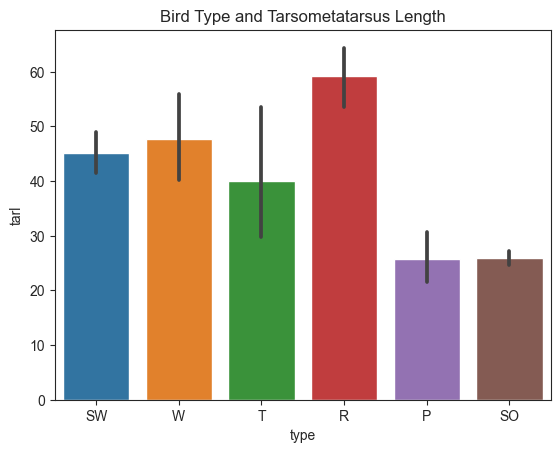

In [18]:
sns.set_style('ticks')
sns.barplot(x='type',y='tarl', data=data);
plt.title('Bird Type and Tarsometatarsus Length')
plt.show()

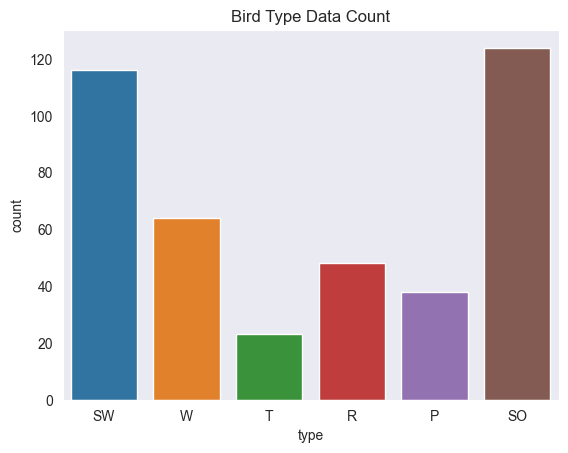

In [19]:
sns.set_style('dark')
plt.title("Bird Type Data Count")
sns.countplot(x="type", data=data);

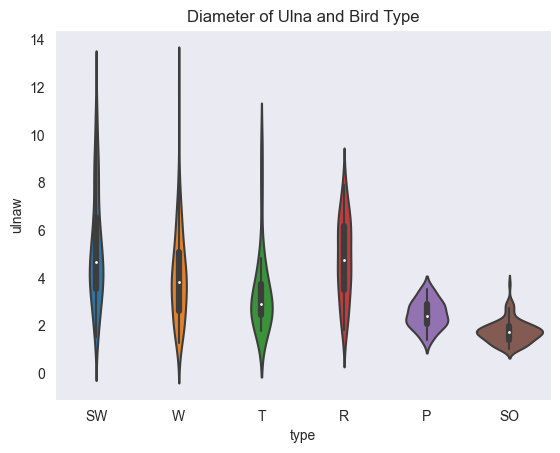

In [20]:
sns.violinplot(x='type',y='ulnaw',data=data);
plt.title('Diameter of Ulna and Bird Type')
plt.show()

##### Label Encoding

In [21]:
le = LabelEncoder()

In [22]:
data['type']=le.fit_transform(data['type'])

In [23]:
data.type.unique()

array([3, 5, 4, 1, 0, 2])

##### Checking imbalance

In [24]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

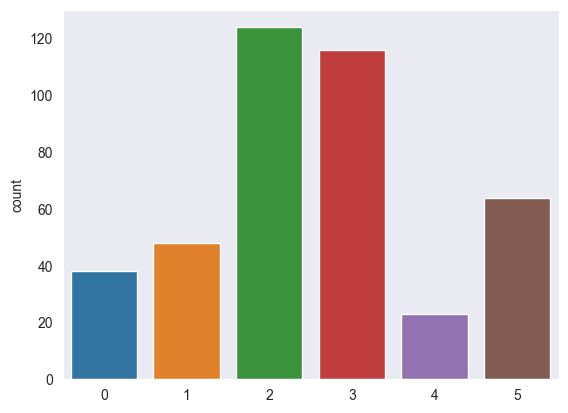

In [25]:
sns.countplot(x=y);

##### We can see that the target data is not balanced. We may use RandomOverSampler to balance the data

In [26]:
over_sampler = RandomOverSampler()

In [27]:
x, y = over_sampler.fit_resample(x,y)

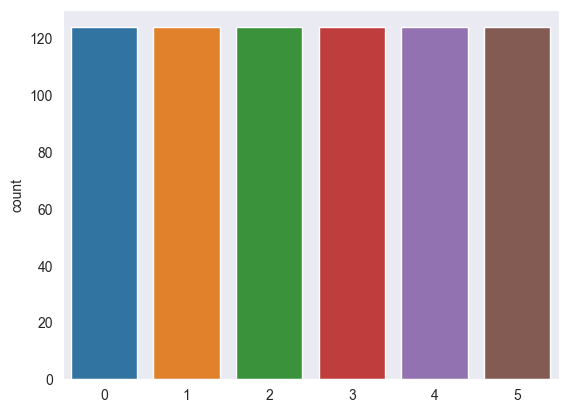

In [28]:
sns.countplot(x=y);

we can now see that the data is balanced correctly

##### Scaling

In [29]:
sc = StandardScaler()

In [30]:
x = sc.fit_transform(x)

##### Selecting RandomForest Model

In [31]:
model = RandomForestClassifier()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [33]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  1.0
confusion_matrix train is::  [[ 98   0   0   0   0   0]
 [  0 101   0   0   0   0]
 [  0   0  96   0   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0   0 102   0]
 [  0   0   0   0   0  99]]
confusion_matrix test is::  [[26  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0 28  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 25]]
Wrong Predictions made: 0 / 149
************************************************************


In [34]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [35]:
OUTPUT

,ACTUAL,PREDICTION
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
739,5,5
740,5,5
741,5,5
742,5,5


##### Plotting confusion matrix for training and testing data 

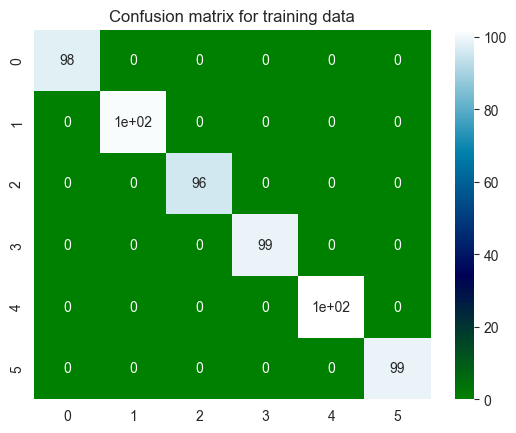

In [36]:
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='ocean');

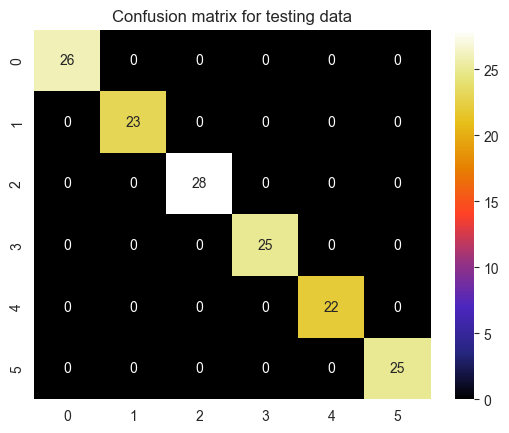

In [37]:
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='CMRmap');

##### We have to binarize the target

In [38]:
y = label_binarize(y, classes=[3, 5, 4, 1, 0, 2])
n_classes = 6

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

##### Initializing the classifier

In [40]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0),)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

##### Computing AUC and ROC for each class and plotting ROC curve


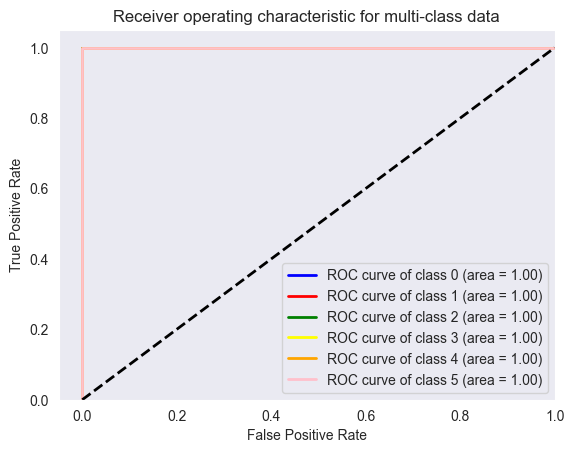

In [41]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()